In [62]:
import os
import pandas as pd
import numpy as np

In [9]:
os.getcwd()

'C:\\Users\\Mohamed.Imran'

In [10]:
os.chdir('H:\Projects\Direct Debit\DD_work')

In [4]:
%matplotlib inline

import csv
import numpy as np
from matplotlib import pyplot
from sklearn import cluster

## SVM

In [148]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
%matplotlib inline

from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import accuracy_score, classification_report

In [146]:
np.random.seed(0)

iris = datasets.load_iris()
X, y = iris.data, iris.target

indices = np.random.permutation(len(X))

X_train = X[indices[:-30]]
y_train = y[indices[:-30]]

X_test = X[indices[-30:]]
y_test = y[indices[-30:]]

In [151]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [149]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [150]:
result = clf.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['virginica']


In [155]:
result1 = clf.predict([[3, 5, 4, 2],[3, 1, 0, 1]])

print(iris.target_names[result1])

['virginica' 'setosa']


In [156]:
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9333333333333333


In [157]:
target_names = iris.target_names

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.82      0.90        11
   virginica       0.82      1.00      0.90         9

   micro avg       0.93      0.93      0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [160]:
X = iris.data[:, :2] # take only two features
y = iris.target
h = .02 # step size in the mesh

In [161]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [162]:
clf = svm.SVC()
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [163]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

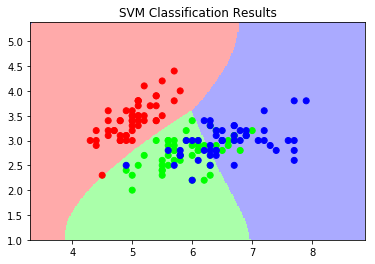

In [164]:
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM Classification Results')
plt.show()

## Cell samples

In [169]:
os.getcwd()

'H:\\Projects\\Direct Debit\\DD_work'

In [171]:
os.chdir('C:\\Users\\Mohamed.Imran\\Desktop\\Imran\\TL\\dataset')

In [199]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df[:3]

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


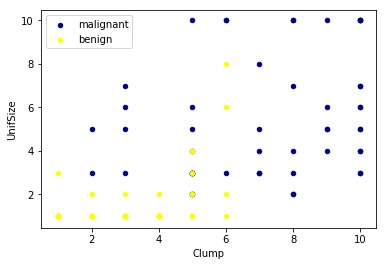

In [200]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [201]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [202]:
# cell_df.loc[cell_df['BareNuc'].notnull()]

In [203]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [204]:
cell_df['BareNuc'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [205]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [206]:
cell_df['Class'].dtype

dtype('int64')

In [207]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

In [208]:
y.dtype

dtype('int32')

In [209]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [210]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [211]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

In [196]:
from sklearn.metrics import classification_report, confusion_matrix

In [213]:
# from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhat)
print(confusion_matrix)

[[85  5]
 [ 0 47]]


## NB

In [267]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [268]:
adult_df_rev = pd.read_csv('adult.csv')
adult_df_rev[:3]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [269]:
adult_df_rev.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [270]:
adult_df_rev['income'] = np.where(adult_df_rev['income'] == ' <=50K', 0, 1)

In [271]:
for value in ['workclass', 'education',
          'marital_status', 'occupation',
          'relationship','race', 'sex',
          'native_country', 'income']:
    print (value,":", sum(adult_df_rev[value] == '?'))


workclass : 0
education : 0
marital_status : 0
occupation : 0
relationship : 0
race : 0
sex : 0
native_country : 0
income : 0


In [272]:
# for value in ['workclass', 'education',
#           'marital_status', 'occupation',
#           'relationship','race', 'sex',
#           'native_country', 'income']:
#     adult_df_rev[value].replace(['?'], [adult_df_rev.describe(include='all')[value][2]],
#                                 inplace='True')

In [273]:
le = preprocessing.LabelEncoder()

workclass_cat = le.fit_transform(adult_df_rev.workclass)
education_cat = le.fit_transform(adult_df_rev.education)
marital_cat   = le.fit_transform(adult_df_rev.marital_status)
occupation_cat = le.fit_transform(adult_df_rev.occupation)
relationship_cat = le.fit_transform(adult_df_rev.relationship)
race_cat = le.fit_transform(adult_df_rev.race)
sex_cat = le.fit_transform(adult_df_rev.sex)
native_country_cat = le.fit_transform(adult_df_rev.native_country)

In [274]:
#initialize the encoded categorical columns

adult_df_rev['workclass_cat'] = workclass_cat
adult_df_rev['education_cat'] = education_cat
adult_df_rev['marital_cat'] = marital_cat
adult_df_rev['occupation_cat'] = occupation_cat
adult_df_rev['relationship_cat'] = relationship_cat
adult_df_rev['race_cat'] = race_cat
adult_df_rev['sex_cat'] = sex_cat
adult_df_rev['native_country_cat'] = native_country_cat

In [275]:
#drop the old categorical columns from dataframe

dummy_fields = ['workclass', 'education', 'marital_status', 
                  'occupation', 'relationship', 'race',
                  'sex', 'native_country']

adult_df_rev = adult_df_rev.drop(dummy_fields, axis = 1)

In [276]:
#reindex

adult_df_rev = adult_df_rev.reindex_axis(['age', 'workclass_cat', 'fnlwgt', 'education_cat',
                                    'education_num', 'marital_cat', 'occupation_cat',
                                    'relationship_cat', 'race_cat', 'sex_cat', 'capital_gain',
                                    'capital_loss', 'hours_per_week', 'native_country_cat', 
                                    'income'], axis= 1)

adult_df_rev[:3]

,age,workclass_cat,fnlwgt,education_cat,education_num,marital_cat,occupation_cat,relationship_cat,race_cat,sex_cat,capital_gain,capital_loss,hours_per_week,native_country_cat,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0


In [277]:
#Standardization

num_features = ['age', 'workclass_cat', 'fnlwgt', 'education_cat', 'education_num',
                'marital_cat', 'occupation_cat', 'relationship_cat', 'race_cat',
                'sex_cat', 'capital_gain', 'capital_loss', 'hours_per_week',
                'native_country_cat']

scaled_features = {}
for each in num_features:
    mean, std = adult_df_rev[each].mean(), adult_df_rev[each].std()
    scaled_features[each] = [mean, std]
    adult_df_rev.loc[:, each] = (adult_df_rev[each] - mean)/std

In [278]:
scaled_features

{'age': [38.58164675532078, 13.640432553581146],
 'workclass_cat': [3.8688922330395257, 1.4559597607854557],
 'fnlwgt': [189778.36651208502, 105549.97769702233],
 'education_cat': [10.298209514449802, 3.870263950576831],
 'education_num': [10.0806793403151, 2.5727203320673406],
 'marital_cat': [2.6118362458155464, 1.5062217231623993],
 'occupation_cat': [6.572740394951015, 4.228856803450072],
 'relationship_cat': [1.4463622124627622, 1.6067709504166081],
 'race_cat': [3.6658579281963086, 0.8488056043017224],
 'sex_cat': [0.6692054912318418, 0.47050642987580854],
 'capital_gain': [1077.6488437087312, 7385.292084839299],
 'capital_loss': [87.303829734959, 402.960218649059],
 'hours_per_week': [40.437455852092995, 12.34742868173081],
 'native_country_cat': [36.718866128190164, 7.823781904186173]}

In [279]:
#train test split

features = adult_df_rev.values[:,:14]
target = adult_df_rev.values[:,14]
features_train, features_test, target_train, target_test = train_test_split(features,target, test_size = 0.33, random_state = 10)

In [280]:
adult_df_rev['income'].unique()

array([0, 1], dtype=int64)

In [281]:
#Naive Bayes

clf = GaussianNB()
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)

In [282]:
accuracy_score(target_test, target_pred)

0.7989019169923692

## NB - ud

In [ ]:
# Naive Bayes

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [283]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [284]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [285]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [286]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [287]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [259]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[65,  3],
       [ 7, 25]], dtype=int64)

In [288]:
accuracy_score(y_test, y_pred)

0.9

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


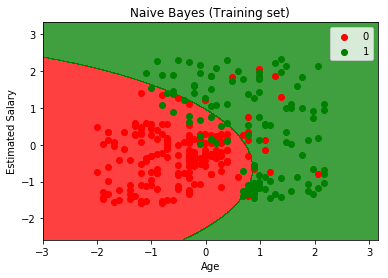

In [257]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


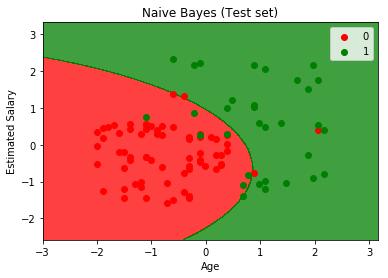

In [258]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [260]:
GaussianNB?